# Eyes

## Imports

In [28]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../DataLoader')

from Dataset import Dataset
from helpers import imshow
from IPython.display import Image

## Creation of a Dataset container

In [29]:
DATASET_PATH= '../Data'
dp = Dataset(path=DATASET_PATH)[0]

## Gaze vector

Let's get first the gaze vector in camera coordinates <br>
To do so, we'll apply the extrinsic matrix without the translation row (since we're working with vectors)

In [30]:
extrinsic_rotation = dp.extrinsic_matrix[:, :3]

gaze_left_world = dp.eye_gaze.axis_directions.left_eye.axis_directions.visual_axis_direction
gaze_right_world = dp.eye_gaze.axis_directions.right_eye.axis_directions.visual_axis_direction

gaze_left_cam = extrinsic_rotation @ gaze_left_world
gaze_right_cam = extrinsic_rotation @ gaze_right_world

Everything is now ready for plotting!

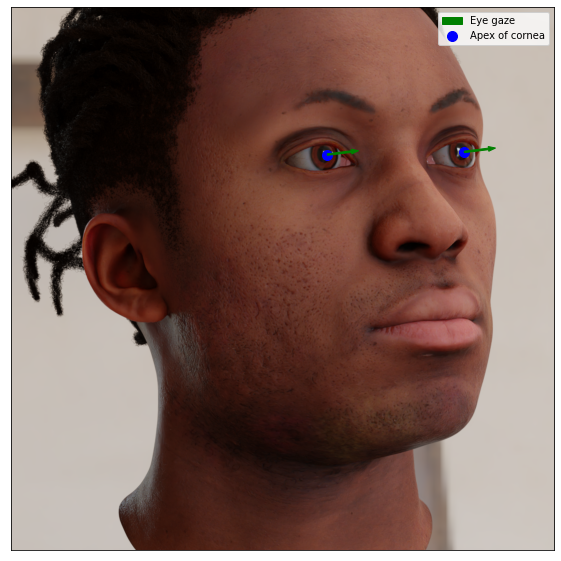

In [31]:
eye_left_img = dp.apex_of_cornea_point.key_2d.camera.left_eye
eye_right_img = dp.apex_of_cornea_point.key_2d.camera.right_eye

gaze_arrow_length = 80
imshow(dp.rgb_img)
plt.scatter(*np.flip(eye_left_img), color='b', s=100, label='Apex of cornea')
plt.scatter(*np.flip(eye_right_img), color='b', s=100)
plt.arrow(*np.flip(eye_left_img), *(gaze_arrow_length * gaze_left_cam[:2]), color='g', label='Eye gaze', width=3)
plt.arrow(*np.flip(eye_right_img), *(gaze_arrow_length * gaze_right_cam[:2]), color='g', width=3)
plt.legend()

## Translation from gaze vector to Euler angles

This is the coordinates system viewed from the camera:

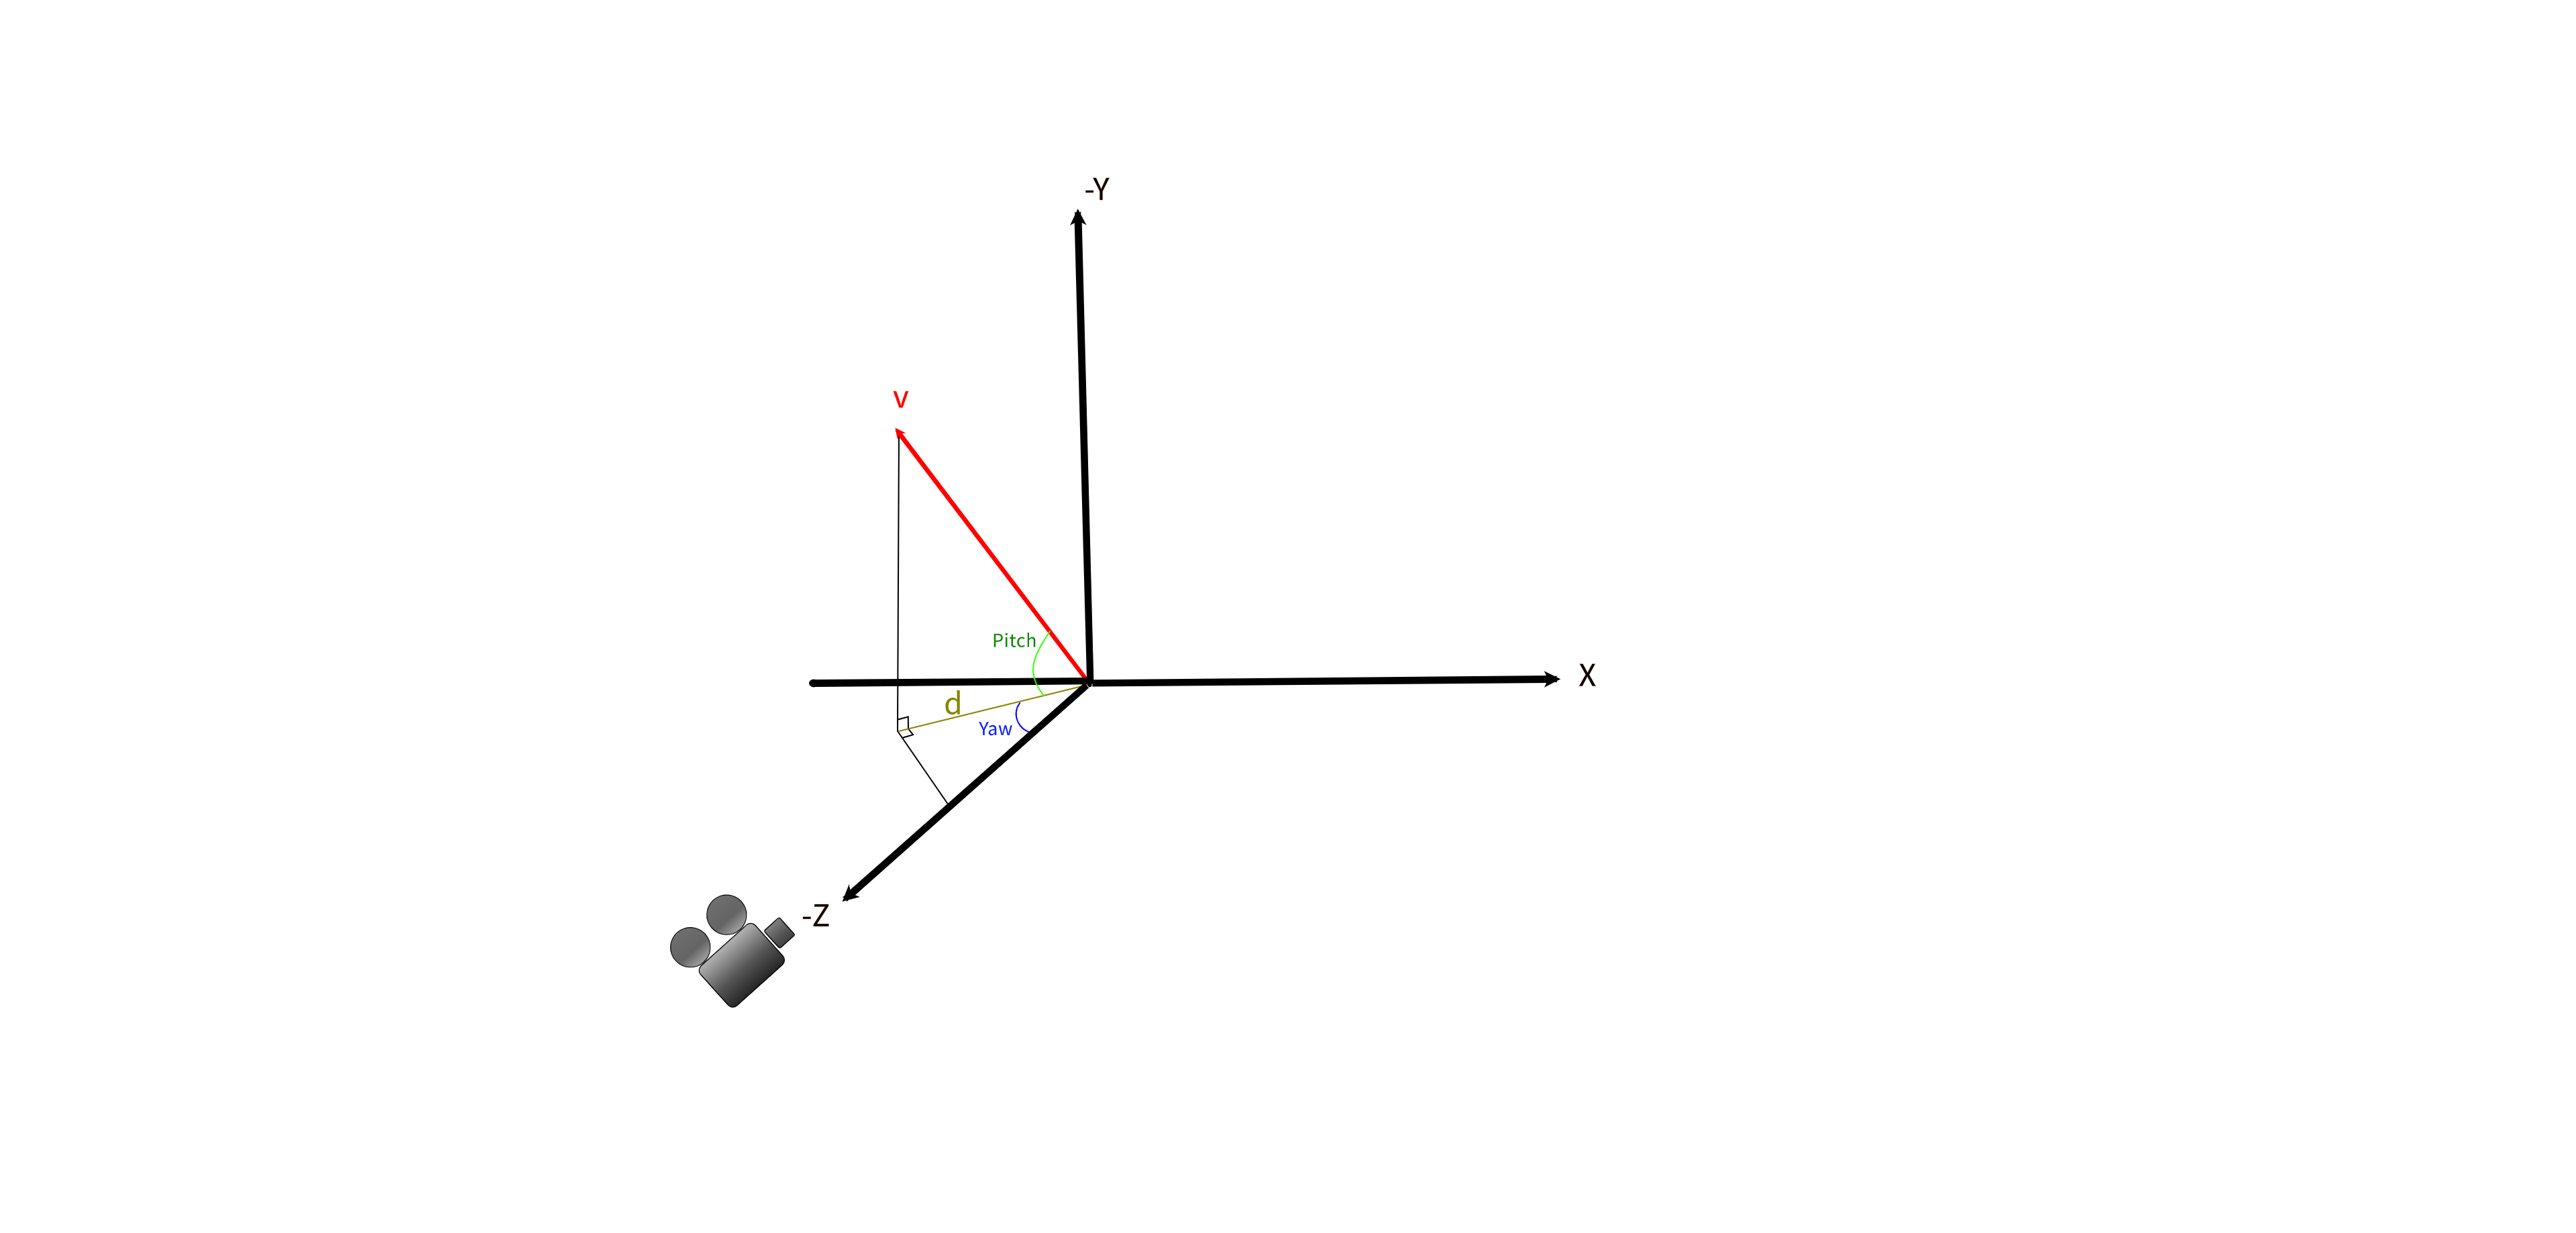

In [32]:
Image(filename='Images/eye_gaze.png', width=1200)

$\vec{v}$ is the gaze vector. Pitch and yaw are defined as below:<br><br>
$d = \sqrt{x^2 + z^2} $<br>
$cos(yaw) = -z/d$<br>
$tan(pitch) = y/d$<br>

Therefore, after adjusting with the sign of X to get a signed yaw value:<br>
$yaw = sign(x) * arccos (-z/d)$<br>
$pitch = arctan2(y, d)$<br>

In [33]:

d = np.sqrt(gaze_left_cam[0]**2 + gaze_left_cam[2]**2)
eye_yaw = np.sign(gaze_left_cam[0]) * np.rad2deg(np.arccos(-gaze_left_cam[2]/ d))
eye_pitch = np.rad2deg(np.arctan2(gaze_left_cam[1], d))

print(f'Left eye gaze yaw: {eye_yaw} degrees')
print(f'Left eye gaze pitch: {eye_pitch} degrees')

Left eye gaze yaw: 34.78085704553802 degrees
Left eye gaze pitch: -4.04300346019678 degrees
